In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df=pd.read_csv('train (3).csv',usecols=['Age','Fare','Survived'])

In [4]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [5]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [6]:
X

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


In [7]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
clf=DecisionTreeClassifier()

In [12]:
clf.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [13]:
y_pred=clf.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
accuracy_score(y_pred,y_test)

0.6424581005586593

In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6599375780274657

In [18]:
from sklearn.preprocessing import KBinsDiscretizer

In [19]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

n_bins=15 → har feature ko 15 buckets (intervals) me tod dega.encode='ordinal' → bucket number assign karega (0,1,2,...).
strategy='quantile' → bins equal-frequency pe banenge (har bin me lagbhag same number of samples).

Maan lo ek feature hai Age:
[18, 22, 25, 30, 35, 40, 45, 50, 60, 70]
Ab tumne bola ki mujhe 3 bins banane hain.
Bin 1 → [18 - 35],Bin 2 → [36 - 50],Bin 3 → [51 - 70]
Toh ye values iss tarah transform ho jayengi:
[0, 0, 0, 0, 0, 1, 1, 1, 2, 2]
🔹 Important Parameters. n_bins → kitne bins chahiye (default = 5)
encode → output kis format me chahiye: "ordinal" → bin numbers deta hai (0,1,2,…)
"onehot" → one-hot encoding ke form me deta hai,"onehot-dense" → same as onehot but dense array
strategy → bin banane ka tarika: "uniform" → bins of equal width (default)
"quantile" → bins with equal number of samples , "kmeans" → clusters based binning using kmeans

In [22]:
from sklearn.compose import ColumnTransformer

In [23]:
#X_train ke column 0 (Age) par kbin_age apply hoga. Aur column 1 (Fare) par kbin_fare apply hoga.
trf=ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

Age 12 aur 25 → 0th bin (young group). Age 40, 60 → 1st bin (middle group)
Age 80 → 2nd bin (old group) . Fare values apne-apne bins me chale gaye (quantile ke basis pe).

In [25]:
X_train

,Age,Fare
331,45.5,28.5000
733,23.0,13.0000
382,32.0,7.9250
704,26.0,7.8542
813,6.0,31.2750
...,...,...
106,21.0,7.6500
270,NaN,31.0000
860,41.0,14.1083
435,14.0,120.0000


In [26]:
trf=ColumnTransformer([
    ('first',kbin_age,['Age']),
    ('second',kbin_fare,['Fare'])
])

In [54]:
# X_trf=trf.fit_transform()
X_train_trf=trf.fit_transform(X_train)
X_test_trf=trf.transform(X_test)

C:\Users\iaman\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
C:\Users\iaman\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:397: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\iaman\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inver

In [56]:
X_train.isnull().sum()

Age     0
Fare    0
dtype: int64

In [58]:
from sklearn.impute import SimpleImputer

In [60]:
imputer=SimpleImputer(strategy='mean')

In [62]:
X_train[['Age']]=imputer.fit_transform(X_train[['Age']])

In [64]:
X_test[['Age']]=imputer.transform(X_test[['Age']])

In [66]:
X_train.isnull().sum()

Age     0
Fare    0
dtype: int64

Tumne KBinsDiscretizer lagaya hai apne Age feature pe. Ye continuous numbers (jaise 0.42, 25, 38, 54, 80) ko intervals (bins) me tod raha hai.
Matlab continuous age ko discrete categories me convert kar raha hai, jaise:
[0.42 – 6) → Bin 1

[6 – 16) → Bin 2

[16 – 19) → Bin 3
... aur aise hi.

bin_edges_ ka matlab: bin_edges_ ek array deta hai wo cut points jaha bins banaye gaye hain.
Tumhare case me:
[ 0.42,  6, 16, 19, 21, 23, 25, 28, 30,
  32, 35, 38, 42, 47, 54, 80 ]
Iska matlab:
Minimum value (0.42) se leke maximum value (80) tak continuous age ko tod diya gaya hai 15 buckets (intervals) me.Ab koi banda agar 27 saal ka hai → wo [25–28) wale bin me chale jaayega.
Koi 41 saal ka hai → wo [38–42) wale bin me chale jaayega.
🔹 Zaroorat kyu hai?
Continuous variable ko bins me todne ka fayda:
Simplify karna → Continuous values ko categories me convert karke algorithm ke liye simpler representation.
(e.g., "Young", "Adult", "Old"). Non-linear relation capture karna → Shayad survival ke chances linear nahi hain age ke saath. Binning se relation samajhna aasaan hota hai.
Handle outliers → Agar koi 80 saal ka hai aur koi 81 ka hai, dono ko ek hi category me daal dena, taaki extreme values ka effect kam ho.

In [70]:
trf.fit(X_train)

C:\Users\iaman\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
C:\Users\iaman\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:397: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\iaman\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inver

,transformers,"[('first', ...), ('second', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,n_bins,15
,encode,'ordinal'
,strategy,'quantile'


In [72]:
# ab access karte hain
print(trf.named_transformers_["first"].bin_edges_)   # 👈 direct attribute
print(trf.named_transformers_["second"].bin_edges_)

[array([ 0.42      ,  8.4       , 18.        , 21.        , 23.        ,
        25.        , 28.        , 29.49884615, 31.        , 34.        ,
        38.        , 44.        , 51.        , 80.        ])            ]
[array([  0.     ,   7.2292 ,   7.75   ,   7.88916,   7.925  ,   8.6625 ,
         10.5    ,  13.     ,  15.54834,  21.045  ,  26.     ,  29.355  ,
         39.6875 ,  65.     ,  90.     , 512.3292 ])                     ]


| Feature | Strategy | Kya hota hai                                                         |
| ------- | -------- | -------------------------------------------------------------------- |
| Age     | Quantile | Har bin me roughly equal number of passengers                        |
| Fare    | Uniform  | Har bin ka range width equal, number of passengers alag ho sakta hai |


In [75]:
output=pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [77]:
output

,age,age_trf,fare,fare_trf
331,45.500000,11.0,28.5000,10.0
733,23.000000,4.0,13.0000,7.0
382,32.000000,8.0,7.9250,4.0
704,26.000000,5.0,7.8542,2.0
813,6.000000,0.0,31.2750,11.0
...,...,...,...,...
106,21.000000,3.0,7.6500,1.0
270,29.498846,7.0,31.0000,11.0
860,41.000000,10.0,14.1083,7.0
435,14.000000,1.0,120.0000,14.0


In [79]:
output['age'].shape

(712,)

In [81]:
output['age_trf'].shape

(712,)

In [83]:

output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [85]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
26,29.498846,7.0,7.2250,0.0,"(28.0, 29.499]","(0.0, 7.229]"
434,50.000000,11.0,55.9000,12.0,"(44.0, 51.0]","(39.688, 65.0]"
412,33.000000,8.0,90.0000,14.0,"(31.0, 34.0]","(65.0, 90.0]"
361,29.000000,6.0,27.7208,10.0,"(28.0, 29.499]","(26.0, 29.355]"
733,23.000000,4.0,13.0000,7.0,"(21.0, 23.0]","(10.5, 13.0]"


Agar humare bins kuch aise hain:
Age bins: [0–8.4), [8.4–18), [18–21), ...] → 0th bin, 1st bin, 2nd bin …
Fare bins: [0–7.22), [7.22–7.75), ...] → 0th bin, 1st bin …
Tab array me [11., 10.] ka matlab:
Age → 11th bin
Fare → 10th bin
[4., 7.] ka matlab:
Age → 4th bin
Fare → 7th bin

In [88]:
X_train_trf

array([[11., 10.],
       [ 4.,  7.],
       [ 8.,  4.],
       ...,
       [10.,  7.],
       [ 1., 14.],
       [ 3., 13.]])

In [90]:
X_train_trf.shape

(712, 2)

In [92]:
clf=DecisionTreeClassifier

In [94]:
type(X_train_trf)


numpy.ndarray

In [96]:
type(y_train)


pandas.core.series.Series

In [98]:
type(clf)

abc.ABCMeta

In [100]:
from sklearn.tree import DecisionTreeClassifier

clf2 = DecisionTreeClassifier()
clf2.fit(X_train_trf, y_train)
y_pred = clf2.predict(X_test_trf)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6312849162011173

In [108]:
X_trf = trf.fit_transform(X_train)
np.mean(cross_val_score(DecisionTreeClassifier(),X_train,y_train,cv=10,scoring='accuracy'))

C:\Users\iaman\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
C:\Users\iaman\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:397: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\iaman\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inver

0.6221048513302035

In [110]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()

In [112]:
discretize(5,'kmeans')

ValueError: Input X contains NaN.
KBinsDiscretizer does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [114]:
from sklearn.impute import SimpleImputer

# Age me median fill karo
imputer = SimpleImputer(strategy='median')
X['Age'] = imputer.fit_transform(X[['Age']])


In [116]:
def discretize(bins, strategy):
    # Fill missing values first
    from sklearn.impute import SimpleImputer
    X_filled = X.copy()
    imputer = SimpleImputer(strategy='median')
    X_filled['Age'] = imputer.fit_transform(X_filled[['Age']])
    
    # KBinsDiscretizer
    kbin_age = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)

    trf = ColumnTransformer([
        ('first', kbin_age, [0]),  # Age
        ('second', kbin_fare, [1]) # Fare
    ])

    X_trf = trf.fit_transform(X_filled)
    print("10-Fold CV Accuracy:", np.mean(cross_val_score(DecisionTreeClassifier(), X_trf, y, cv=10, scoring='accuracy')))

    # Plots for Age
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X_filled['Age'])
    plt.title("Age Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0], color='red')
    plt.title("Age After")
    plt.show()

    # Plots for Fare
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X_filled['Fare'])
    plt.title("Fare Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1], color='red')
    plt.title("Fare After")
    plt.show()


In [120]:
import matplotlib.pyplot as plt

C:\Users\iaman\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\iaman\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


10-Fold CV Accuracy: 0.6634082397003744


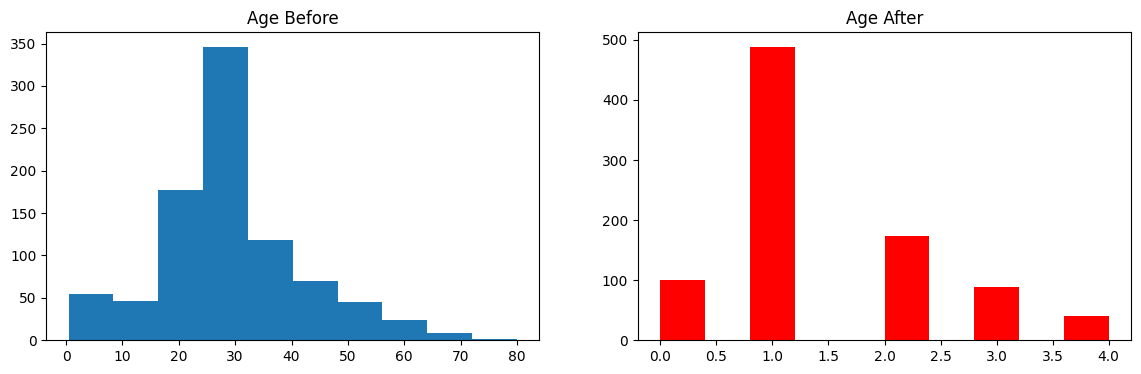

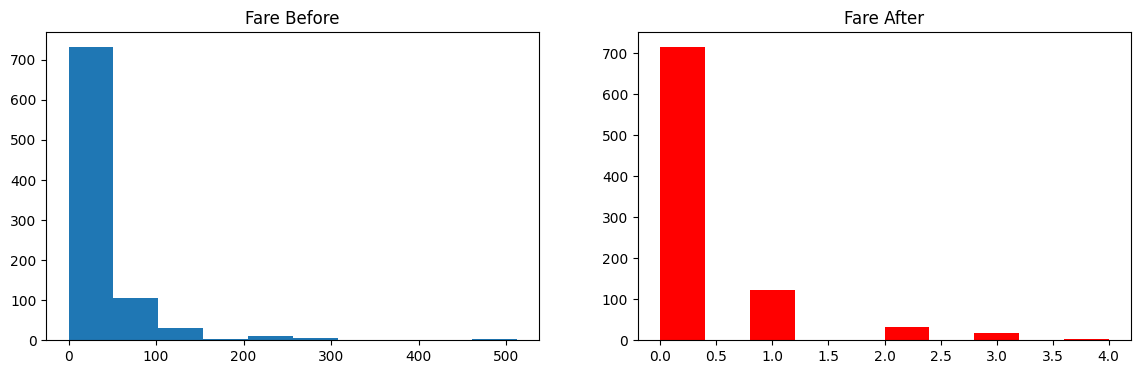

In [122]:
discretize(5,'kmeans')